## Signal and Image Processing Lab 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import math
import cv2
import numexpr
# from google.colab.patches import cv2_imshow

In [3]:
original = np.matrix([[3, 2, 1, 0], [6, 7, 4, 7], [1, 2, 3, 4], [1, 1, 0, 1]])
original

matrix([[3, 2, 1, 0],
        [6, 7, 4, 7],
        [1, 2, 3, 4],
        [1, 1, 0, 1]])

In [4]:
max = np.max(original)
print(np.ceil(math.log2(max)))

3.0


In [5]:
digi_negative = max - original
digi_negative

matrix([[4, 5, 6, 7],
        [1, 0, 3, 0],
        [6, 5, 4, 3],
        [6, 6, 7, 6]])

In [6]:
threshold = 4
thresholding = np.where(original<threshold,0,1)
thresholding

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

### Spatial Enhancement on Cameraman Image

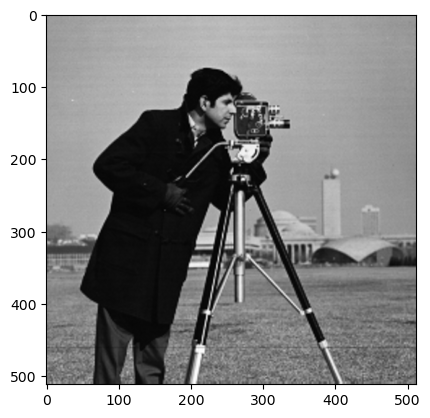

In [33]:
image = cv2.imread('cameraman.tif') # loading the given image
plt.imshow(image, cmap="gray");
plt.show()

#### Digital Negative 
*Subtract each pixel value with the maximum value of the image*

In [8]:
max_intensity = image.max() # find max intensity in image

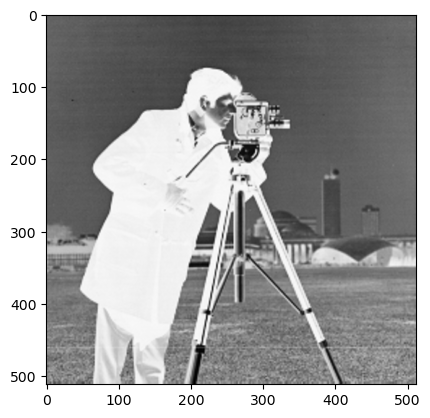

In [9]:
cam_negative =  max_intensity - image
minmin = np.min([np.min(image), np.min(cam_negative)])
maxmax = np.max([np.max(image), np.max(cam_negative)])
plt.imshow(cam_negative, cmap="gray",vmin=minmin, vmax=maxmax);
plt.show()

##### Thresholding
*Split image into 2 intesities high and low*

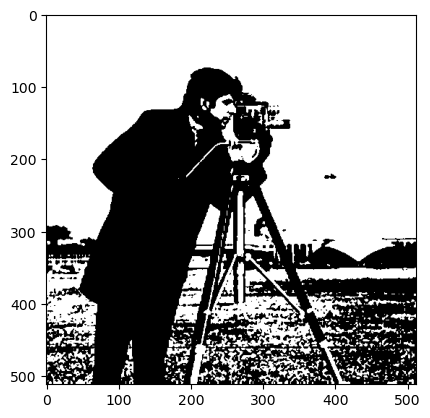

In [10]:
threshold = 128 #thresholding limit
cam_threshold = np.where(image>threshold,max_intensity,0)
plt.imshow(cam_threshold, cmap="gray");
plt.show()

Misc. *Invert and threshold*

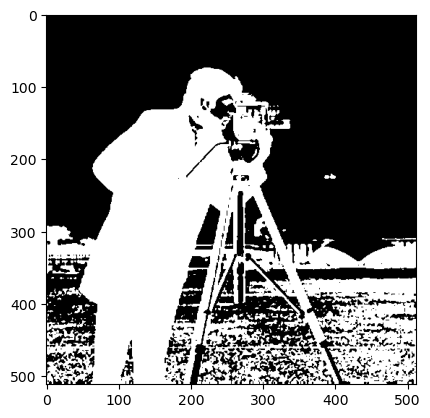

In [35]:
threshold = 128 # limit for classification
cam_threshold = np.where(image<threshold,max_intensity,0)
plt.imshow(cam_threshold, cmap="gray");
plt.show()

##### Grey level sampling without background
* s = L - 1 [a<r<b]
* s = 0

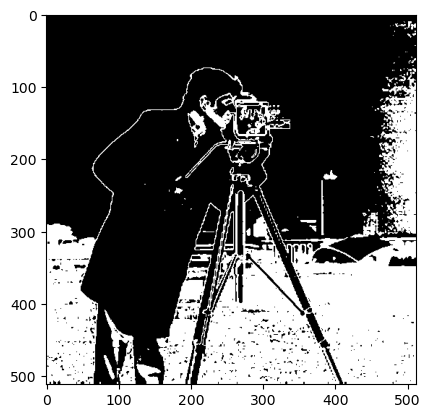

In [12]:
lower = 50
greater = 150
cam_threshold = np.where((lower<image) & (image<greater),max_intensity,0)
plt.imshow(cam_threshold, cmap="gray");
plt.show();

##### Grey level sampling with background
* s = L - 1 [a< r <b]
* s = r

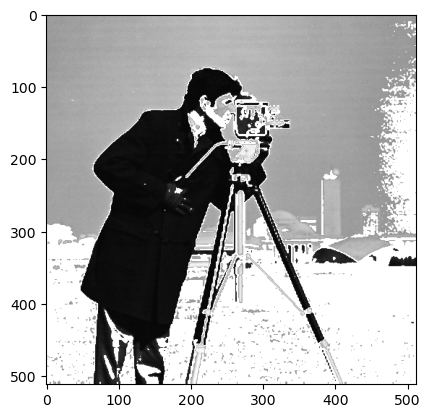

In [13]:
lower = 50
greater = 150
cam_threshold = np.where((lower<image) & (greater>image),max_intensity,image)
plt.imshow(cam_threshold, cmap="gray");
plt.show();

### Neighbourhood Processing in Spatial Domain

Intially testing the logic on a np.array and figure out creation of function

In [14]:
image_matrix = np.random.randint(0,7,size=(7,7))
image_matrix

array([[3, 4, 2, 1, 5, 2, 3],
       [0, 1, 2, 1, 6, 2, 3],
       [1, 4, 3, 6, 1, 6, 6],
       [5, 2, 2, 6, 6, 6, 1],
       [2, 5, 3, 3, 2, 2, 5],
       [0, 3, 3, 1, 1, 6, 1],
       [1, 2, 1, 2, 3, 0, 3]])

In [15]:
padded_image_matrix = np.pad(image_matrix,pad_width=(2,2))
padded_image_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 4, 2, 1, 5, 2, 3, 0, 0],
       [0, 0, 0, 1, 2, 1, 6, 2, 3, 0, 0],
       [0, 0, 1, 4, 3, 6, 1, 6, 6, 0, 0],
       [0, 0, 5, 2, 2, 6, 6, 6, 1, 0, 0],
       [0, 0, 2, 5, 3, 3, 2, 2, 5, 0, 0],
       [0, 0, 0, 3, 3, 1, 1, 6, 1, 0, 0],
       [0, 0, 1, 2, 1, 2, 3, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [16]:
positional = 2 # positional is the location -> corner where we want to start applying mask from 
padded_image_matrix[positional-1:(positional-1)+3,positional-1:(positional-1)+3]

array([[0, 0, 0],
       [0, 3, 4],
       [0, 0, 1]])

In [17]:
coef = 1 / 9
mask = coef * np.ones((3,3))   #simple 3x3 mask / averaging filter
mask

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [18]:
# apply mask to selected portion and find value 
round(((padded_image_matrix[positional-1:(positional-1)+3,positional-1:(positional-1)+3]*mask)).sum(),3)

0.889

In [19]:
def apply_filter(image_matrix,mask,mask_width,padding_width):
    padded_image_matrix = np.pad(image_matrix,pad_width=(padding_width,padding_width)) # padding_width = 2
    copy_image = padded_image_matrix
    for i in range(padding_width,len(padded_image_matrix)-padding_width):
        for j in range(padding_width,len(padded_image_matrix)-padding_width):   
            copy_image[i,j]=round(((padded_image_matrix[i-1:(i-1)+mask_width,j-1:(j-1)+mask_width]*mask)).sum(),3)   
            #mask_width = 3
    return copy_image

In [20]:
image_matrix = np.random.randint(0,7,size=(7,7))
coef = 1 / 9
mask = coef * np.ones((3,3))
value = apply_filter(image_matrix,mask,mask_width=3,padding_width=2)
value

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0],
       [0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0],
       [0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0],
       [0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0],
       [0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [21]:
import matplotlib.image as mpimg

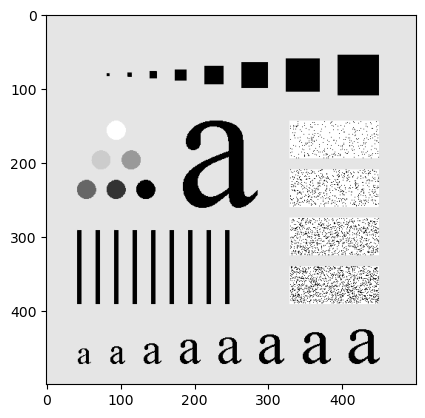

In [22]:
image_matrix = mpimg.imread("task2.tif")
plt.imshow(image_matrix,cmap='gray')
plt.show();

In [23]:
image_matrix

array([[229, 229, 229, ..., 229, 255, 255],
       [229, 229, 229, ..., 229, 229, 229],
       [229, 229, 229, ..., 229, 229, 229],
       ...,
       [229, 229, 229, ..., 229, 229, 229],
       [229, 229, 229, ..., 229, 229, 229],
       [229, 229, 229, ..., 229, 229, 255]], dtype=uint8)

In [24]:
coef = 1 / 9
mask = coef * np.ones((3,3))
value = apply_filter(image_matrix,mask,mask_width=3,padding_width=2)
value

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 101, ...,  95,   0,   0],
       ...,
       [  0,   0,  89, ...,  83,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

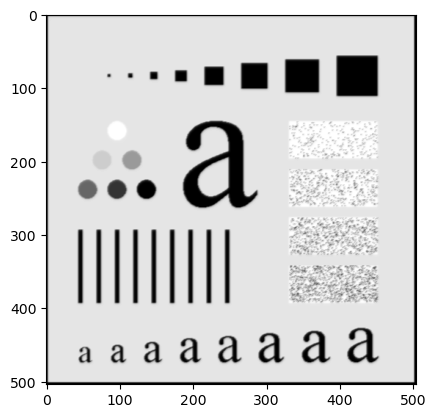

In [25]:
plt.imshow(value,cmap='gray')
plt.show();

In [26]:
def create_filter(mask_width):
    coef = 1/pow(mask_width, 2)
    mask = coef * np.ones((mask_width, mask_width))
    return mask

In [27]:
def apply_filter(image_matrix, mask_width):
    padding_width = mask_width-2
    mask = create_filter(mask_width)
    padded_image_matrix = np.pad(image_matrix, pad_width=(
        padding_width, padding_width))  # padding_width = 2
    copy_image = padded_image_matrix
    for i in range(padding_width, len(padded_image_matrix)-padding_width):
        for j in range(padding_width, len(padded_image_matrix)-padding_width):
            copy_image[i, j] = round(
                ((padded_image_matrix[i-1:(i-1)+mask_width, j-1:(j-1)+mask_width]*mask)).sum(), 3)
            #mask_width = 3
    return copy_image[padding_width:-(padding_width+mask_width), padding_width:-(padding_width+mask_width)]

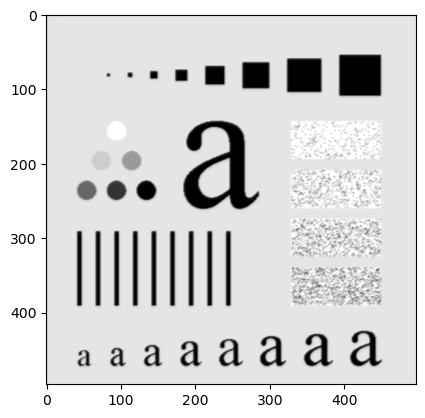

In [28]:
value = apply_filter(image_matrix, mask_width=3)
plt.imshow(value, cmap='gray')
plt.show()

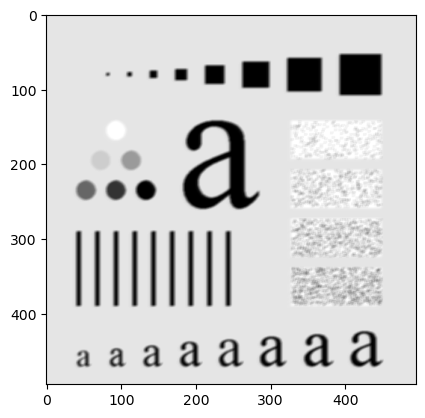

In [29]:
value = apply_filter(image_matrix, mask_width=5)
plt.imshow(value, cmap='gray')
plt.show()

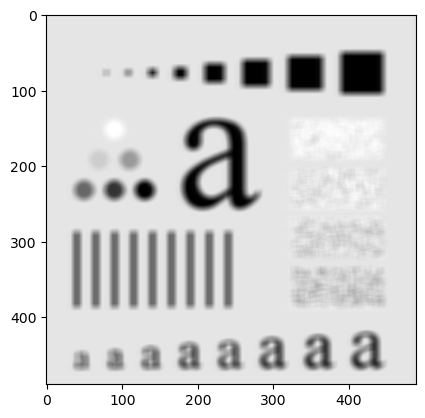

In [30]:
value = apply_filter(image_matrix, mask_width=11)
plt.imshow(value, cmap='gray')
plt.show()

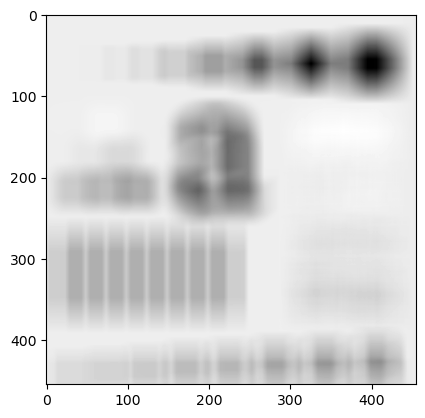

In [31]:
value = apply_filter(image_matrix, mask_width=45)
plt.imshow(value, cmap='gray')
plt.show()

##### *We canconclude that on increasing size of mask/filter,  the image increases to get blurred as more pixel intensities are used to calculate the average in the low pass filter.*

*Misc*

High Pass Filter

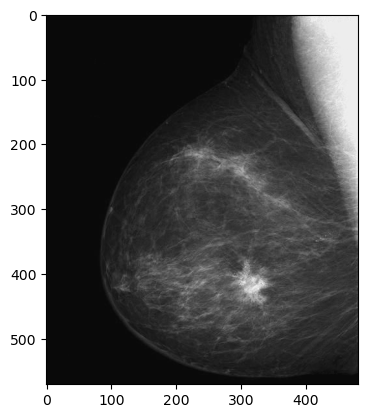

In [89]:
image_matrix = mpimg.imread("misc1hpf.tif")
plt.imshow(image_matrix,cmap='gray')
plt.show();

In [93]:
image_matrix.shape

(571, 482)

In [90]:
def create_filter(mask_width):
    coef = pow(mask_width, 2) - 1
    mask = -1 * np.ones((mask_width, mask_width))
    mask[mask_width//2,mask_width//2] = coef
    return mask

In [91]:
print(create_filter(3))

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


In [121]:
def apply_filter(image_matrix, mask_width):
    padding_width = mask_width-2
    mask = create_filter(mask_width)
    max_length = np.max(image_matrix.shape)
    padded_image_matrix = np.zeros(
        (max_length+padding_width, max_length+padding_width))
    padded_image_matrix[padding_width:padding_width+image_matrix.shape[0],
                        padding_width:padding_width+image_matrix.shape[1]] += image_matrix
# padding_width = 2
#     print(padded_image_matrix)
#     print(padded_image_matrix.shape)
    copy_image = padded_image_matrix
    for i in range(padding_width, len(padded_image_matrix)-padding_width):
        for j in range(padding_width, len(padded_image_matrix)-padding_width):
            copy_image[i, j] = round(
                ((padded_image_matrix[i-1:(i-1)+mask_width, j-1:(j-1)+mask_width]*mask)).sum(), 3)
            #mask_width = 3
    return copy_image[padding_width:-(padding_width+mask_width), padding_width:-(padding_width+mask_width)]

<ipython-input-121-8d1bf08d6e19>:15: RuntimeWarning: overflow encountered in multiply
  copy_image[i, j] = round(
C:\Users\atind\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\atind\anaconda3\lib\site-packages\matplotlib\image.py:446: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
C:\Users\atind\anaconda3\lib\site-packages\matplotlib\image.py:451: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


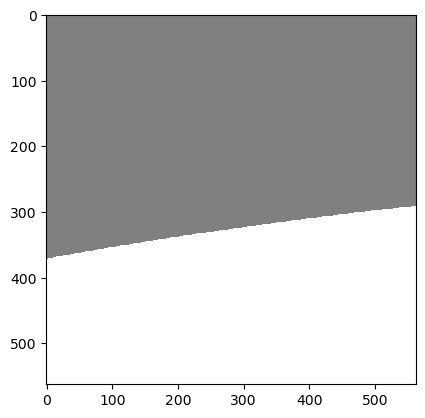

In [123]:
value = apply_filter(image_matrix, mask_width=5)
plt.imshow(value, cmap='gray')
plt.show()